In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../CSV/bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


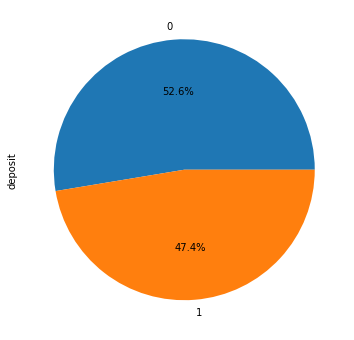

In [4]:
plt.figure(figsize=(6,6))
df["deposit"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

### Naive Aggregation

In [13]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

In [23]:
model_list = [('lr',lr),('dt1',dt1),('dt2',dt2)]

In [10]:
from sklearn.ensemble import VotingClassifier

<h5>1. Hard voting</h5>

In [24]:
vc1 =  VotingClassifier(estimators=model_list)

In [25]:
create_model(vc1)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1760
           1       0.81      0.82      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None...
                             ('dt2',
   

<h5>2. Soft voting</h5>

In [17]:
vc2 = VotingClassifier(estimators=model_list,voting="soft")

In [18]:
create_model(vc2)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.82      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.83      0.83      0.83      3349



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None...
                             ('dt2',
   

### Bootstrap Aggregation

In [26]:
from sklearn.ensemble import BaggingClassifier

<h5>1. Bagging</h5>

In [31]:
# use odd no. of n_estimators for hard voting for better result
bg1 = BaggingClassifier(LogisticRegression(),n_estimators=9,random_state=1)

In [32]:
create_model(bg1)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=9, n_jobs=None, oob_score=False,
                  random_state=1, verb

<h5>2. Pasting<h5>

In [39]:
# Pasting - bootstrap=Flase
bg2 = BaggingClassifier(LogisticRegression(),n_estimators=9,random_state=1,bootstrap=False)

In [40]:
create_model(bg2)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=9, n_jobs=None, oob_score=False,
                  random_state=1, ver

In [32]:
# Bootstrap output is not better than Naive aggregation

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
#bg3 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=100,random_state=1)

In [46]:
rf1 = RandomForestClassifier(n_estimators=11)

In [47]:
create_model(rf1)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
# Pruning using maxfeature
rf2 = RandomForestClassifier(n_estimators=11,max_features=11,random_state=1)

In [50]:
create_model(rf2)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Stacking

In [ ]:
# Run this command in anaconda prompt 
# conda install mlxtend --channel conda-forge

In [51]:
from mlxtend.classifier import StackingClassifier

In [52]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")
model_list = [lr,dt1,dt2]

In [53]:
# meta classifier model --> Logistic Reg / Decision Tree
meta_lr = LogisticRegression()

In [54]:
stack =  StackingClassifier(classifiers=model_list,meta_classifier=meta_lr)

In [55]:
create_model(stack)

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1760
           1       0.75      0.89      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.80      3349
weighted avg       0.82      0.81      0.80      3349



StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                    

In [20]:
stack.meta_clf_.coef_

array([[0.58201572, 5.9887401 , 5.9887401 ]])

In [56]:
meta_dt = DecisionTreeClassifier()

In [57]:
stack1 =  StackingClassifier(classifiers=model_list,meta_classifier=meta_dt)

In [58]:
create_model(stack1)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1760
           1       0.79      0.76      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                    

In [59]:
stack1.meta_clf_.feature_importances_

array([0., 0., 1.])